# Contornos Activos
|Asignatura   |Datos del Alumno|Fecha        |
|:-----------:|:--------------:|:-----------:|
|Percepción Computacional|Nombres y Apellidos:| 12/06/2019|
|:|Juan Pablo Muñoz|
|:|Henry Bautista|
|:|Diego Zabaleta|
|:|Elmer Bautista|
|.|Ronie Martinez|

#### Trabajo presentado como actividad propuesta para la asignatura "Percepción Computacional"

# Importe de librerías

Importamos las librerías que necesitamos y ocupamos en el programa, para esta práctica es de especial enfasis la librería **active_contour** que pertenece a la librería **segmentation** dentro de **skimage**

In [1]:
#Importamoslibrerias
import numpy as np
import cv2
from skimage import io, img_as_float, filters, img_as_ubyte, feature
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour
from skimage.morphology import erosion,disk,square, dilation
from skimage.morphology import binary_erosion,binary_dilation

import matplotlib.patches as mpatches
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
from skimage.segmentation import chan_vese

# Cargar imagenes
Importamos las imágenes que vamos a utilizar

### Segundo acercamiento
Para este nuevo enfoque, empezamos con la imagen tras la **Apertura**, la binarizamos con un elemento estructural cuadrado para afinar los bordes.
Utilizamos la funcion label para generar clusters de pixeles, de acuerdo a si estos tienen el mismo valor que de sus vecinos.


C:\Users\rsmartinez\Anaconda3\lib\site-packages\numpy\lib\histograms.py:778: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)


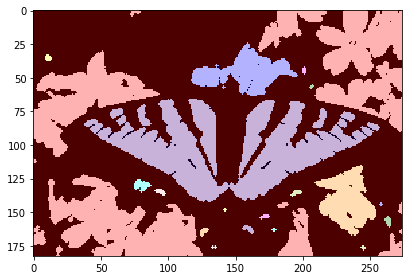

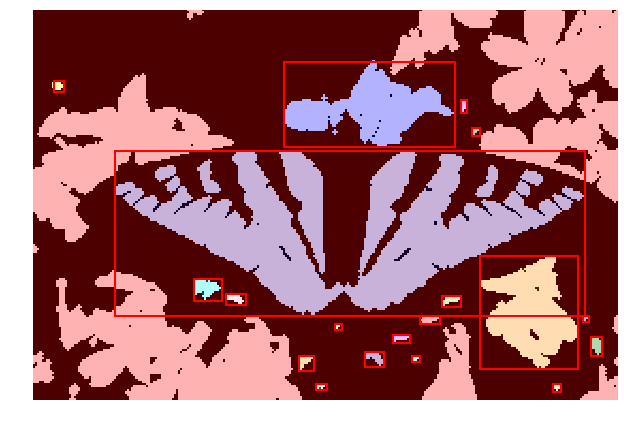

In [5]:
#Se intenta nuevamente, removiendo regiones innecesarias que pueden 
#afectar el ejercicio
image = imagenDilatMar

#Aplicamos threshold
thresh = threshold_otsu(image)
bw = closing(image > thresh, square(2))

#Eliminamos los artefactos el borde  la imagen
cleared = clear_border(bw)

#label de regiones de imagen
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)

io.imshow(image_label_overlay)
io.show()

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 1:
        # draw rectangle around
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

En el siguiente código, hacemos un reconocimiento de las áreas pequeas, naturalmente, la mariposa siendo el área más grande no se tomará en cuenta, tras esto se eliminará las zonas más pequeas

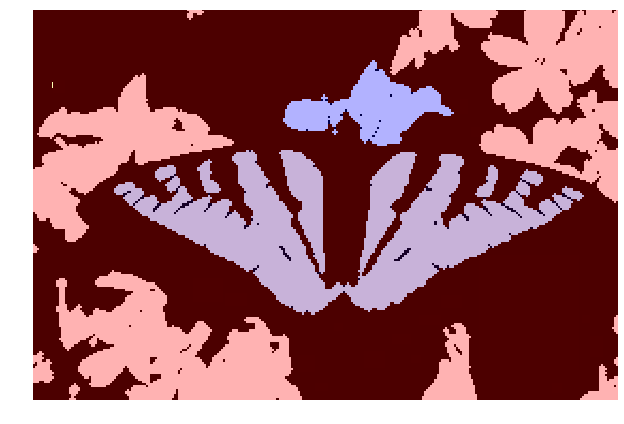

In [6]:
#Aplicamos threshold
thresh = threshold_otsu(imagenDilatMar)
bw = closing(image > thresh, square(2))

#Eliminamos los artefactos el borde  la imagen
cleared = clear_border(bw)

#label de regiones de imagen
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    #Tomamos las regiones mas grandes
    if region.area < 1350:
        #Dibujar alrededor de imagen
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=True, 
                                  edgecolor=[0.3, 0. , 0. ], linewidth=2, alpha=1, 
                                  facecolor =[0.3, 0. , 0. ])
        ax.add_patch(rect)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

Finalmente aplicamos nuevamente la segmentación por contornos activos. Y observamos el resultado

C:\Users\rsmartinez\Anaconda3\lib\site-packages\skimage\filters\_gaussian.py:108: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  warn(RuntimeWarning(msg))


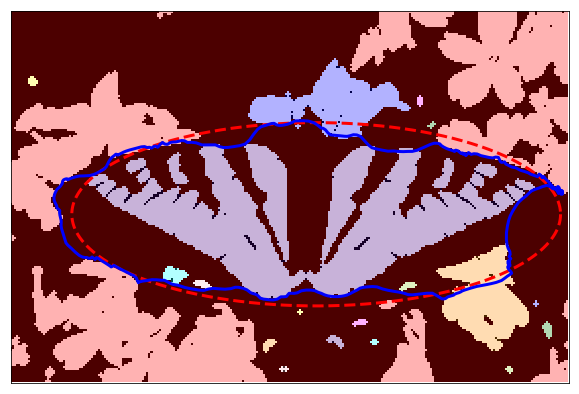

In [7]:
#Se define el área donde se va a buscar el contorno, para este ejemplo un ovalo
s = np.linspace(0, 2*np.pi, 400)
x = 150 + 120*np.cos(s)
y = 100 + 45*np.sin(s)
init = np.array([x, y]).T

#Buscamos los contornos con la función active_contour
snake = active_contour(gaussian(image_label_overlay, 3),
                       init, alpha=0.08, beta=0.01, gamma=0.001, 
                       bc='periodic',w_edge=True,w_line=False)
#Visualizamos la imagen
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image_label_overlay, cmap=plt.cm.gray)
ax.plot(init[:, 0], init[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, image_label_overlay.shape[1], image_label_overlay.shape[0], 0])
plt.show()

# Búho

Para el búho, con el fin de eliminar los detalles causados por el pasto, intentamos realizar también una apertura. Sin embargo, como observaremos, el búho también tiene varios detalles, por lo que la imagen se pierde casi por completo

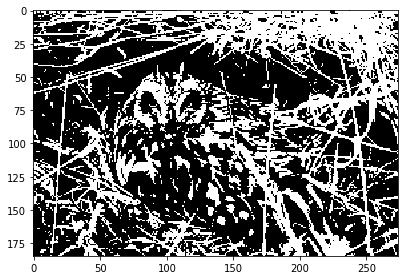

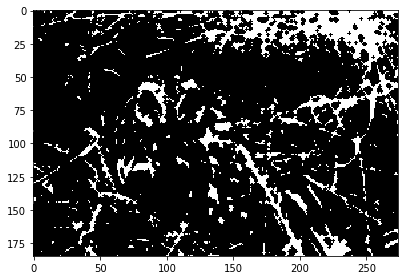

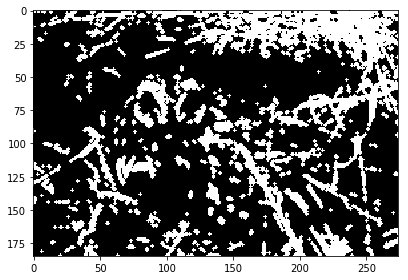

In [8]:
#Se realiza un theshold a la imagen, para mejorarla del ruido
threshBuh = threshold_otsu(imagen2)
binaryBuh = imagen2 > threshBuh
io.imshow(binaryBuh)
io.show()

#Se erosiona la imagen
imagenEroBuh=erosion(binaryBuh)
io.imshow(imagenEroBuh)
io.show()

# Se dilata la imagen
imagenDilatBuh=dilation(imagenEroBuh)
io.imshow(imagenDilatBuh)
io.show()

Para tratar el problema este caso, simplemente vamos a limitarnos a mejorar el contorno de iniciación, reduciendolo para que las interferencias causadas por el cesped alrededor sean mínimas.
Posterior a esto, simplemente utilizamos la imagen original con un filtro gaussiano que ayude a eliminar un poco de los detalles, y el contorno que obtenemos resulta bastante bueno

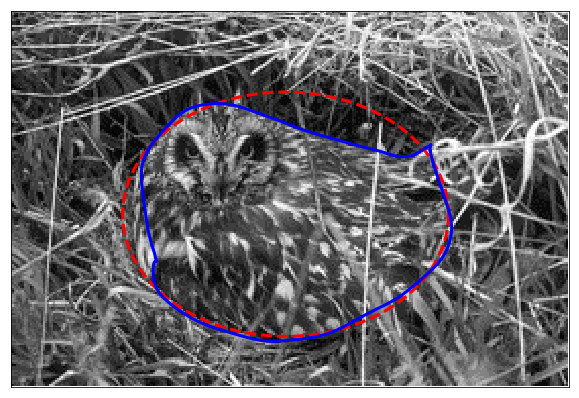

In [9]:
#Debido a que el tratamiento no es efectivo se decide trabajar directamente 
#sobre la imagen con buenos resultados
s = np.linspace(0, 2*np.pi, 400)
x = 135 + 80*np.cos(s)
y = 100 + 60*np.sin(s)
init = np.array([x, y]).T

snake = active_contour(filters.gaussian(imagen2, 3),
                       init, alpha=0.035, beta=1, gamma=0.001)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(imagen2, cmap=plt.cm.gray)
ax.plot(init[:, 0], init[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, imagen2.shape[1], imagen2.shape[0], 0])

plt.show()

# Caballo

### Aproximación por contornos activos
Para el caballo, realizamos dos aproximaciones al problema, el primero, y siguiendo las instrucciones, se lo realiza con la utilización de contornos activos.
Para el caballo, a diferencia de la mariposa, utilizamos la técnica de la Clausura, pues conserva detalles como las patas de los caballos, y ayuda a definir mejor las siluetas de estos.

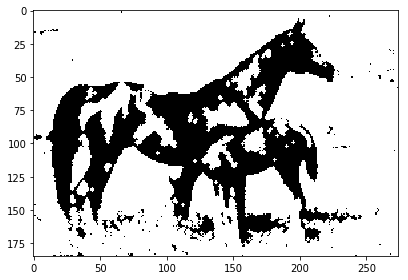

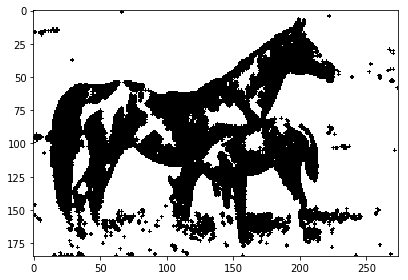

In [10]:
#Se realiza un theshold, dilata y erosiona para mejorarla del ruido
threshCab = threshold_otsu(imagen3)
binaryCab = imagen3 > threshCab

imagenDilatCab=dilation(binaryCab)
io.imshow(imagenDilatCab)
io.show()

imagenEroCab=erosion(imagenDilatCab)
io.imshow(imagenEroCab)
io.show()

Una vez realizada la **Clausura**, utilizamos el mismo método de la mariposa, pero en este caso utilizamos un circulo en lugar de un óvalo como figura inicial. Le damos los parámetros de alpha, beta y gamma a la función de contornos activos, y graficamos el resultado.
Como podemos observar, los contornos se acoplan de manera muy precisa al lomo del caballo, pero tienen problemas con las patas, esto debido a la interferencia del entorno

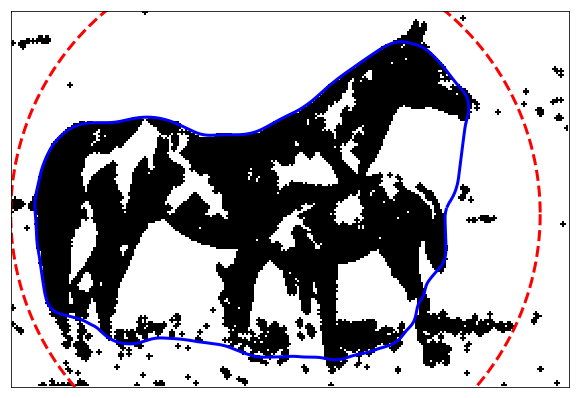

In [11]:
#Se ajusta iterativamente el contorno y utilizamos snake para trabajar 
#los contornos 
s = np.linspace(0, 2*np.pi, 400)
x = 130 + 130*np.cos(s)
y = 100 + 130*np.sin(s)
init = np.array([x, y]).T

snake1 = active_contour(gaussian(imagenEroCab, 3),
                       init, alpha=0.12, beta=0.005, gamma=0.015, 
                       bc='periodic',w_edge=True)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(imagenEroCab, cmap=plt.cm.gray)
ax.plot(init[:, 0], init[:, 1], '--r', lw=3)
ax.plot(snake1[:, 0], snake1[:, 1], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, imagenEroCab.shape[1], imagenEroCab.shape[0], 0])

plt.show()

A este resultado inicial, podemos añadirle también un contorno activo que trate de acoplarse únicamente al caballo más pequeño, y luego graficar ambos en una misma salida


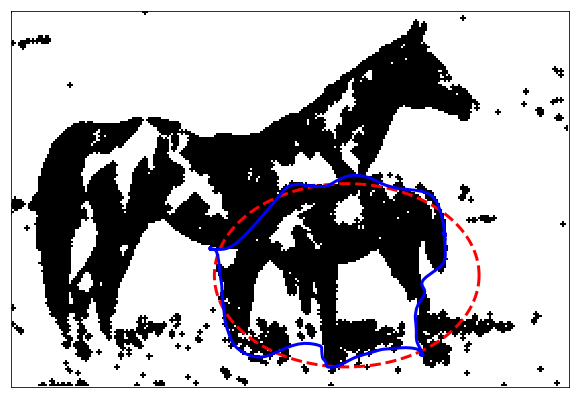

In [12]:
s2 = np.linspace(0, 2*np.pi, 400)
x2 = 165 + 65*np.cos(s)
y2 = 130 + 45*np.sin(s)
init2 = np.array([x2, y2]).T

snake2 = active_contour(gaussian(imagenEroCab, 3),
                       init2, alpha=0.012, beta=0.05, gamma=0.0015, 
                       bc='periodic',w_edge=True)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(imagenEroCab, cmap=plt.cm.gray)
ax.plot(init2[:, 0], init2[:, 1], '--r', lw=3)
ax.plot(snake2[:, 0], snake2[:, 1], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, imagenEroCab.shape[1], imagenEroCab.shape[0], 0])

plt.show()

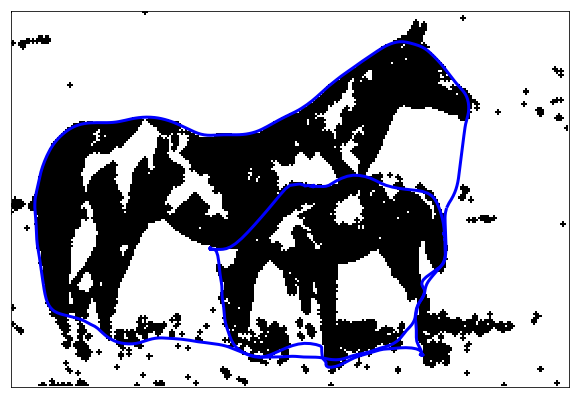

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(imagenEroCab, cmap=plt.cm.gray)
#ax.plot(init2[:, 0], init2[:, 1], '--r', lw=3)
ax.plot(snake1[:, 0], snake1[:, 1], '-b', lw=3)
ax.plot(snake2[:, 0], snake2[:, 1], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, imagenEroCab.shape[1], imagenEroCab.shape[0], 0])

plt.show()

### Aproximación por una segmentación diferente

Se realizó una aproximación utilizando un método de segmentación diferente, que encontramos interesante aplicar a esta última imagen. 
Este método de segmentación resulta muy útil para imágenes donde los bordes, ya sea por la calidad de la imagen, o por la imagen como tal, no están muy definidos.
El método utiliza la diferencia energía en la imagen, para generar los segmentos.


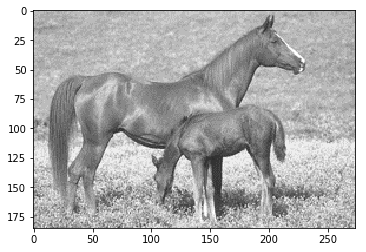

In [14]:
im7 = io.imread('tema10_act1c.png',as_gray=True )

#convertimos a 8 bits de profundidad para facilidad de operaciones (0 a 255)
out = img_as_ubyte(im7) 
plt.imshow(out, cmap='gray', vmin=0, vmax=255)

Aplicamos el filtro de Chan_Vese, y mostramos el resultadotanto de la imagen original, como la segmentada y además la evolución de la energía de la imagen de auerdo a las iteraciones

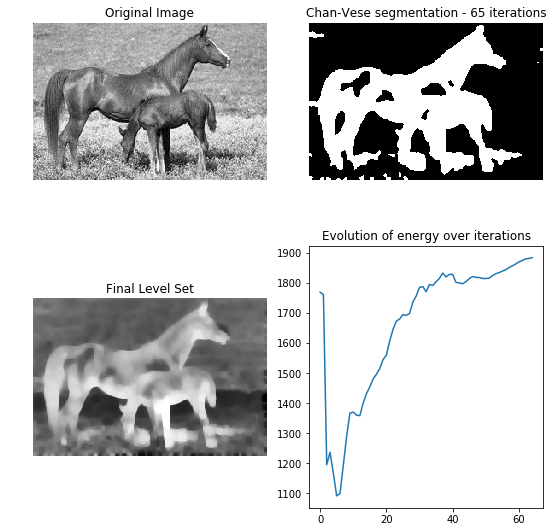

In [15]:
image = out
# Feel free to play around with the parameters to see how they impact the result
cv = chan_vese(image, mu=0.25, lambda1=1, lambda2=1, tol=1e-3, max_iter=100,
               dt=0.5, init_level_set="checkerboard", extended_output=True)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image", fontsize=12)

ax[1].imshow(cv[0], cmap="gray")
ax[1].set_axis_off()
title = "Chan-Vese segmentation - {} iterations".format(len(cv[2]))
ax[1].set_title(title, fontsize=12)

ax[2].imshow(cv[1], cmap="gray")
ax[2].set_axis_off()
ax[2].set_title("Final Level Set", fontsize=12)

ax[3].plot(cv[2])
ax[3].set_title("Evolution of energy over iterations", fontsize=12)

fig.tight_layout()
plt.show()

Utilizamos un filtro de Canny para reconocimiento de bordes

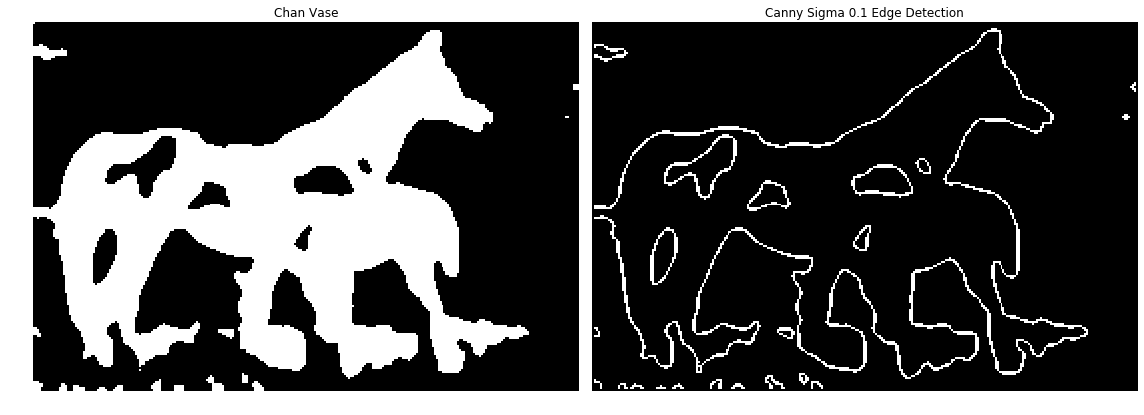

In [16]:
canny2 = feature.canny(cv[0], sigma=0.1)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(16, 8))

ax[0].imshow(cv[0], cmap=plt.cm.gray)
ax[0].set_title('Chan Vase')

ax[1].imshow(canny2, cmap=plt.cm.gray)
ax[1].set_title('Canny Sigma 0.1 Edge Detection')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

Utilizando el mismo método que con la mariposa para la eliminación de las zonas pequeñas de la imagen, que en este caso son una especie de ruido, obtenemos una imagen muy interesante

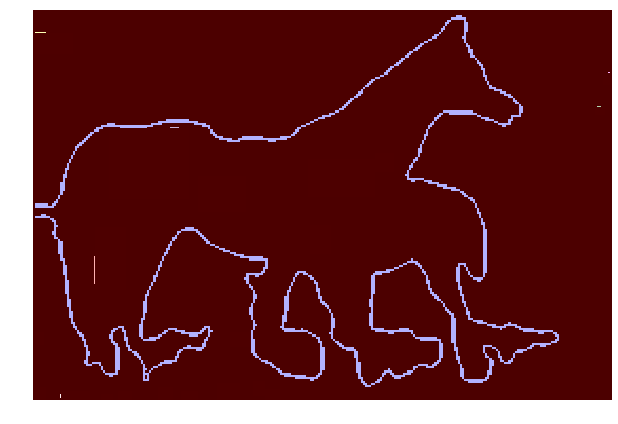

In [17]:
image = canny2

# apply threshold
thresh = threshold_otsu(image)
bw = closing(image > thresh, square(1))

# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area < 200:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=True, 
                                  edgecolor=[0.3, 0. , 0. ], linewidth=2, alpha=1, 
                                  facecolor =[0.3, 0. , 0. ])
        ax.add_patch(rect)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

## Conclusiones
-	El manejo de contornos requiere un tratamiento de acuerdo con el tipo de imagen.
-	Utilizar los algoritmos de contornos activos requiere practica para colocar los parámetros más adecuados.
-	Es importante validar la forma de la imagen para utilizar un circulo, un ovalo o cualquier otra figura para focalizar el contorno.
- Este método, requiere de muchas pruebas con los parámetros adecuados, y aún así, en muchas imágenes los resultados obtenidos podrían no ser los perfectos, debido a la calidad de la imagen, los elementos dentro de la imagen, entre otros factores que puedan ayudar a la detección de bordes.
- Dado las dificultades presentadas, sería recomendable que, de ser necesario y posible, en un sistema de visión artificial se trate de generar las condiciones más optimas posibles de la imagen a capturar, si es que estas son en un ambiente controlado (por ejemplo una fábrica). Para facilitar y mejorar la precisión de los contornos.
- En caso de una aplicación real, en un ámbito de producción, se podría tratar de mejorar los contrastes, iluminación, y otros factores que pueden afectar la detección de bordes
